# Single variable Linear regression

- hypothesis function：关于 x 的函数，用 $h(x)=\theta_0+\theta_1x$ 表示
- cost function：关于待求参数($\theta$)的函数，用 $J(\theta_0, \theta_1)$ 表示
- Square error cost function: $\frac{1}{2m}\sum_{i=1}^m(h(x^i)-y^i)^2$
- 梯度下降算法(Gradient descent algorithm)：  
$temp0 := \theta_0 - \alpha\frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)$  
$temp1 := \theta_1 - \alpha\frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1)$  
$\theta_0=temp0$  
$\theta_1=temp1$

斜率为正时，$\theta_1$减去一个正数，变小斜率为负数时，$theta_1$减去一个负数，变大。随着
误差越来越小，梯度也会越来越小，所以即使 learning rate 一直不变，也是能够收敛的。
![Gradient descent](./image/gradient_descent.png)

- 凸函数(convex function)：没有局部最优解，只有全局最优解
- "Batch" Gradient Descent：使用所有训练样本计算梯度


Coefficients:  [938.23786125]
Mean squared error: 25509.23
Variance score: 0.34


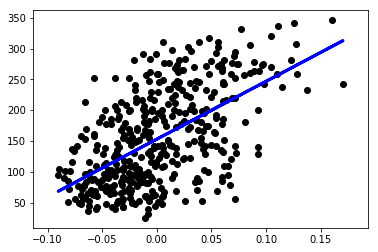

In [15]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_train)

print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_X_train, diabetes_y_pred))
print('Variance score: %.2f' % r2_score(diabetes_y_train, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, diabetes_y_pred, color='blue', linewidth=3)
plt.show()


# Multiple variables linear regression

- Hypothesis function: $h_\theta(x)=\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$，其中$x_0$总是等于 1（为了写公式方便）,又可以写成 $h_\theta(x)=\theta^Tx$
- 梯度下降的公式：$\theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i)x_j^i$

# Feature Scaling
> Make sure features are on a similar scale

确保所有特征值在同一个尺度下，可以加快梯度下降的**速度**（数学证明？）

![feature scaling](./image/feature_scaling.png)

## Mean normalization
> Make features have approximately zero mean.  

减去平均值后再除以最大值

# Polynomial regression 多项式回归
- 特征的不同组合、使用方式会影响回归的结果，例如房子的长度、宽度信息可以组成面积信息
- 要从众多的多项式形式中选择一个 Hypothesis function，例子：$h_\theta(x)=\theta_0+\theta_1x+\theta_2x^2$



# Logistic Regression 逻辑回归
- Hypothesis function: $h_\theta(x)=g(\theta^Tx)$
- Logistic/Sigmoid 函数: $g(z)=\frac{1}{1+e^{-z}},z=\theta^Tx$
- 用于分类问题
- 输出值永远在 $[0, 1]$ 之间，logistic 函数的输出可以看成输入 $x$ 归为某一类的概率
- 以 0.5 作为分类阈值
- TODO: sigmoid 的图
- Decision Boundary：分类的分界线，hypothesis function 的属性，与数据集无关，与 $\theta$ 有关（加图）
- Non-linear desicion boundary：可以在选择高阶复杂多项式作为 $z$，如 $g(\theta_0+\theta_1x_1^2+\theta_2x_2^2)$
